# Исследование аренды сервиса самокатов GoFast

Объект исследования - сервис аренды самокатов GoFast.


**Цель исследования:** Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. 


**Ход исследования:**

1. Проанализировать данные
2. Рассчитать помесячную выручку каждого пользователя
3. Проанализировать разницу в использовании аренды самокатов пользователей с подпиской и без нее.
4. Проверить гипотезы

    -Тратят ли пользователи с подпиской больше времени на поездки?
    
    -Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    
    -Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Данные о пользователях, поездках и подписках, получу из файлов '/datasets/users_go.csv', '/datasets/rides_go.csv', '/datasets/subscriptions_go.csv', соотвественно. 
Зараннее мне известны следующие данные:

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

     без подписки
    -абонентская плата отсутствует;
    -стоимость одной минуты поездки — 8 рублей;
    -стоимость старта (начала поездки) — 50 рублей;
    
     с подпиской Ultra
    -абонентская плата — 199 рублей в месяц;
    -стоимость одной минуты поездки — 6 рублей;
    -стоимость старта — бесплатно.
    
Для начала проведу предобработку данных, проверю на наличие пропусков и дубликатов, при необходимости исправлю это. Создам необходимые таблицы / столбцы с расчетами, визуализирую данные с помощью гистограмм. 

**ЗАГРУЗКА ДАННЫХ**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
users = pd.read_csv('/datasets/user.csv')
rides = pd.read_csv('/datasets/ride.csv')
subscriptions = pd.read_csv('/datasets/subscription.csv')

In [3]:
display(users.head(10))
display(rides.head(10))
display(subscriptions.head(10))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
display(users.info())
display(rides.info())
display(subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

**ПРЕДОБРАБОТКА ДАННЫХ**

In [5]:
#Меняем тип данных
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')
rides['month_num'] = rides['date'].dt.month
#Ищем пропуски
display(users.isna().sum())
display(rides.isna().sum())
display(subscriptions.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id      0
distance     0
duration     0
date         0
month_num    0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Пропуски** вау! ни одного пропуска, можем идти дальше

In [6]:
#Ищем дубликаты
display(users.value_counts())
display(rides.value_counts())
display(subscriptions.value_counts())
#Удаляем дубликаты из таблицы с пользователями
users = users.drop_duplicates().reset_index(drop=True)
users.value_counts()

user_id  name       age  city            subscription_type
209      Андрей     23   Омск            ultra                2
807      Александр  28   Екатеринбург    free                 2
611      Владимир   28   Омск            ultra                2
43       Стефания   22   Омск            ultra                2
737      Мелания    27   Ростов-на-Дону  free                 2
                                                             ..
520      Анжелика   30   Екатеринбург    ultra                1
519      Даниэль    22   Ростов-на-Дону  ultra                1
518      Алиса      22   Ростов-на-Дону  ultra                1
517      Олег       25   Краснодар       ultra                1
1534     Альберт    25   Краснодар       free                 1
Length: 1534, dtype: int64

user_id  distance     duration   date        month_num
1        748.690645   15.041884  2021-11-22  11           1
1105     3232.037291  19.120140  2021-02-24  2            1
         4661.122393  21.159450  2021-03-25  3            1
         4468.509613  12.937019  2021-11-28  11           1
         4057.692285  21.695055  2021-06-05  6            1
                                                         ..
645      4040.109793  17.100274  2021-11-26  11           1
646      2635.251399  11.081349  2021-09-06  9            1
         2853.140708  23.699278  2021-01-28  1            1
         3442.376310  22.753041  2021-03-17  3            1
1534     4928.173852  22.560373  2021-09-13  9            1
Length: 18068, dtype: int64

subscription_type  minute_price  start_ride_price  subscription_fee
free               8             50                0                   1
ultra              6             0                 199                 1
dtype: int64

user_id  name       age  city            subscription_type
1        Кира       22   Тюмень          ultra                1
1020     Камилла    32   Москва          free                 1
1029     Игорь      21   Краснодар       free                 1
1028     Вадим      17   Сочи            free                 1
1027     Мария      21   Сочи            free                 1
                                                             ..
510      Роман      24   Ростов-на-Дону  ultra                1
509      Ян         29   Москва          ultra                1
508      Станислав  15   Тюмень          ultra                1
507      Эвелина    27   Пятигорск       ultra                1
1534     Альберт    25   Краснодар       free                 1
Length: 1534, dtype: int64

In [7]:
#Проверяем остались ли дубликаты
display(users.duplicated().sum())
display(rides.duplicated().sum())
display(subscriptions.duplicated().sum())

0

0

0

**ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ**

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

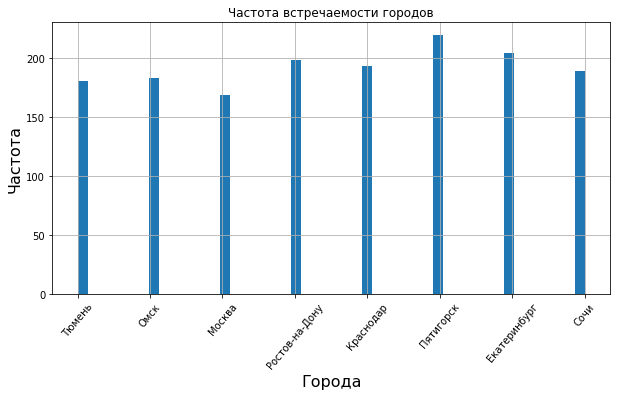

In [8]:
#Исселдуем частоту встречаемости городов

users['city'].hist(bins = 50, xrot=50, figsize=(10,5))
plt.xlabel('Города', fontsize=16)
plt.ylabel('Частота', fontsize=16)
plt.title(r'Частота встречаемости городов')
display(users['city'].describe())
users['city'].value_counts()

    По полученной гистограмме и описанию, можем сделать вывод, что Пятигорск стоит на первом месте по использованию сервиса проката.

free     835
ultra    699
Name: subscription_type, dtype: int64

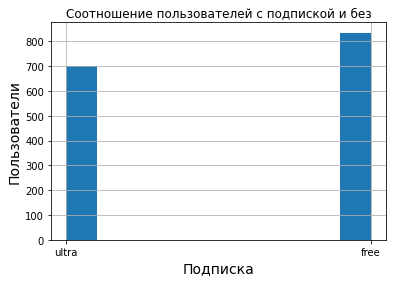

In [9]:
#Исселдуем соотношение пользователей с подпиской и без
users['subscription_type'].hist()
plt.xlabel('Подписка', fontsize=14)
plt.ylabel('Пользователи', fontsize=14)
plt.title(r'Соотношение пользователей с подпиской и без')
users['subscription_type'].value_counts()

    Большая часть пользователей сервиса предпочитают пользоваться прокатом самокатов без подписки.

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

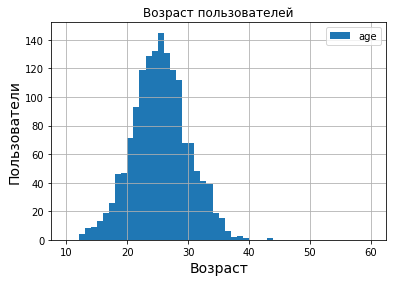

In [10]:
#Исселдуем возраст пользователей
users.plot(y='age', kind='hist', bins = 50, grid=True, range = (10,60), title = 'age')
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Пользователи', fontsize=14)
plt.title(r'Возраст пользователей')
users['age'].describe()

    Активнее всего прокатом пользуются люди в возрасте от 20 до 30 лет. 
    Средний возраст пользователей - 24 года.

count    18068.000000
mean         3.070660
std          1.116831
min          0.000856
25%          2.543226
50%          3.133610
75%          3.776223
max          7.211008
Name: distance, dtype: float64

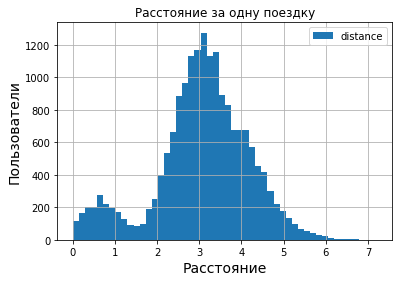

In [11]:
#для удобства понимания перевожу метры в километры
rides['distance'] = rides['distance'] / 1000
#Исселдуем расстояние
rides.plot(y = 'distance', kind = 'hist', bins = 50, grid=True, title='distance')
plt.xlabel('Расстояние', fontsize=14)
plt.ylabel('Пользователи', fontsize=14)
plt.title(r'Расстояние за одну поездку')
rides['distance'].describe()

    В среднем за одну поездку пользователь преодалевает дистанцую 3 км. Больше 4 км пользователи преодалевают все реже. 

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

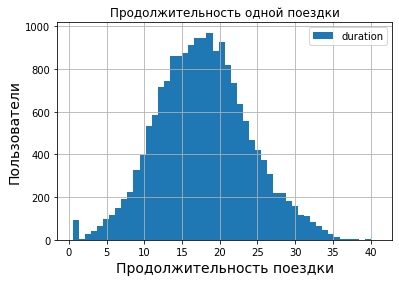

In [12]:
#Исселдуем продолжительность поездки
rides.plot(y = 'duration', kind='hist', bins=50, grid=True, title='duration')
plt.xlabel('Продолжительность поездки', fontsize=14)
plt.ylabel('Пользователи', fontsize=14)
plt.title(r'Продолжительность одной поездки')
rides['duration'].describe()

    Наиболее часто пользователи совершают поездки длиною в 15-20 минут. Есть странный скачок на отметке 0, возможно у пользователей возникают какие-либо сложности с арендой, после чего они заканчивают поездку.

**ОБЪЕДИНЕНИЕ ДАННЫХ**

In [13]:
#Объединяем две таблицы методом merge
print(f"Размер таблицы о пользователях: {users.shape}");
print(f"Размер таблицы о поездках: {rides.shape}");
print(f"Размер таблицы о подписках: {subscriptions.shape}");
go_fast = pd.merge(users, rides, on = 'user_id', how = 'outer')
go_fast_sub = go_fast.merge(subscriptions, on = 'subscription_type', how = 'outer')
print(f"Размер объединенной таблицы: {go_fast.shape}")
go_fast_sub

Размер таблицы о пользователях: (1534, 5)
Размер таблицы о поездках: (18068, 5)
Размер таблицы о подписках: (2, 4)
Размер объединенной таблицы: (18068, 9)


,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4.409919,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2.617592,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,0.754160,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2.694783,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4.028687,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3.781098,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2.840423,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3.826186,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2.902309,16.674362,2021-11-27,11,8,50,0


In [14]:
print(f"Размер объединенной таблицы: {go_fast.shape}")

Размер объединенной таблицы: (18068, 9)


In [15]:
#Создаю таблитцу о пользователей не оформивших подписку
go_fast_free = go_fast_sub[go_fast_sub['subscription_type']=='free']
go_fast_free

,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2.515691,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,0.846933,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4.004434,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1.205911,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3.047379,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3.781098,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2.840423,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3.826186,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2.902309,16.674362,2021-11-27,11,8,50,0


In [16]:
#Создаю таблицу о пользователях с подпиской
go_fast_ultra = go_fast_sub[go_fast_sub['subscription_type']=='ultra']
go_fast_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4.409919,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2.617592,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,0.754160,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2.694783,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4.028687,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3.973046,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3.288703,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3.076159,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4.707846,15.839579,2021-10-17,10,6,0,199


count    11568.000000
mean         3.045495
std          1.246174
min          0.000856
25%          2.366563
50%          3.114648
75%          3.905698
max          7.211008
Name: distance, dtype: float64

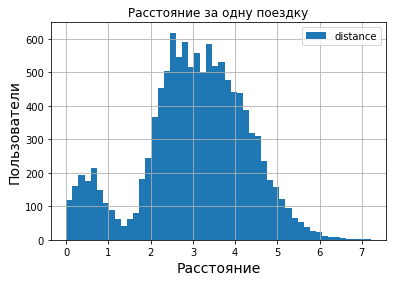

In [17]:
go_fast_free.plot(y='distance', kind='hist', bins=50, grid=True, title='distance')
plt.xlabel('Расстояние', fontsize=14)
plt.ylabel('Пользователи', fontsize=14)
plt.title(r'Расстояние за одну поездку')
go_fast_free['distance'].describe()

    Чаще всего пользователи без подписки проезжают расстояние от 2 до 4 км. Очень редко больше 5 км.

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

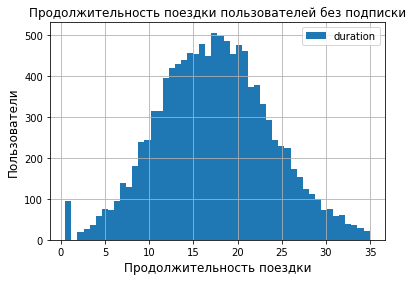

In [18]:
go_fast_free.plot(y='duration', kind='hist', bins=50, grid=True, title='duration')
plt.xlabel('Продолжительность поездки', fontsize=12)
plt.ylabel('Пользователи', fontsize=12)
plt.title(r'Продолжительность поездки пользователей без подписки')
go_fast_free['duration'].describe()

    Наиболее часто пользователи проезжают 15-20 км. В среднем 17 км. Больше 25 км проезжают редко. Есть странный скачок около нуля, возможно пользователи сталкиваются с какими-либо проблемами при использовании, после чего завершают аренду.

count    6500.000000
mean        3.115445
std         0.836895
min         0.244210
25%         2.785444
50%         3.148637
75%         3.560574
max         5.699770
Name: distance, dtype: float64

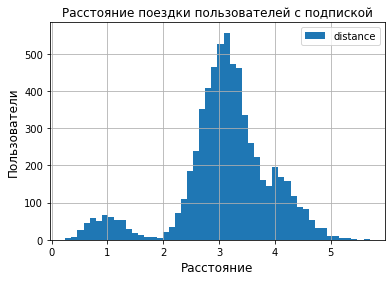

In [19]:
go_fast_ultra.plot(y='distance', kind='hist', bins=50, grid=True, title='distance')
plt.xlabel('Расстояние', fontsize=12)
plt.ylabel('Пользователи', fontsize=12)
plt.title(r'Расстояние поездки пользователей с подпиской')
go_fast_ultra['distance'].describe()

    Среднее значение - 3 км. После 3 км, график идет на спад, скорее всего пользователи с подпиской берут самокат чаще и проезжают меньше, так как им не нужно платить за старт, поэтому они могут брать его несколько раз в день.

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

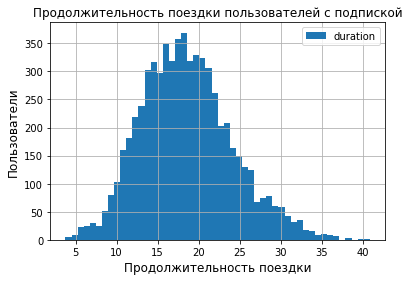

In [20]:
go_fast_ultra.plot(y='duration', kind='hist', bins=50, grid=True, title='duration')
plt.xlabel('Продолжительность поездки', fontsize=12)
plt.ylabel('Пользователи', fontsize=12)
plt.title(r'Продолжительность поездки пользователей с подпиской')
go_fast_ultra['duration'].describe()

    Чаще всего продолжительность поездки 15-20 минут, в среднем - 18 минут, что не сильно отличается от продолжительности поездок пользователей без подписки.

**ПОДСЧЕТ ВЫРУЧКИ**

In [21]:
go_fast_sub['duration'] = np.ceil(go_fast_sub['duration'])
go_fast_agg = pd.pivot_table(go_fast_sub, index = ['month_num', 'user_id'], 
                             values = ['distance', 'duration', 'name', 'subscription_type', 'start_ride_price', 'minute_price', 'subscription_fee' ],
                             aggfunc = {'distance': 'sum', 'duration': 'sum', 'name': 'count',  'start_ride_price': 'sum', 'minute_price': 'min','subscription_fee': 'min', 'subscription_type':'min'})
go_fast_agg.rename(columns = {'name': 'ride'}, inplace = True)
go_fast_agg.head(10)

distance  duration  minute_price  ride  start_ride_price  \
month_num user_id                                                             
1         1        7.027511      42.0             6     2                 0   
          3        3.061777      13.0             6     1                 0   
          5        3.914647      13.0             6     1                 0   
          7        6.478081      28.0             6     2                 0   
          12       3.577151      33.0             6     1                 0   
          13       6.687987      42.0             6     2                 0   
          14       7.699644      35.0             6     2                 0   
          15       4.187621      39.0             6     1                 0   
          20       3.516719      29.0             6     1                 0   
          22       3.058692      13.0             6     1                 0   

                   subscription_fee subscription_type  
month_num user_id                                      
1         1                     199             ultra  
          3                     199             ultra  
          5                     199             ultra  
          7                     199             ultra  
          12                    199             ultra  
          13                    199             ultra  
          14                    199             ultra  
          15                    199             ultra  
          20                    199             ultra  
          22                    199             ultra

In [22]:

go_fast_agg['month_price'] = ((go_fast_agg['start_ride_price'] * go_fast_agg['ride']) + go_fast_agg['minute_price'] * go_fast_agg['duration']) + go_fast_agg['subscription_fee']

display(go_fast_agg.describe())
display(go_fast_agg)

,distance,duration,minute_price,ride,start_ride_price,subscription_fee,month_price
count,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000
mean,4.896363,29.186127,7.199894,1.594564,51.045804,79.610537,402.139352
std,2.911517,16.752464,0.979861,0.831604,54.209482,97.496144,274.734824
min,0.002571,1.000000,6.000000,1.000000,0.000000,0.000000,58.000000
25%,2.972202,17.000000,6.000000,1.000000,0.000000,0.000000,234.000000
50%,3.988724,24.000000,8.000000,1.000000,50.000000,0.000000,331.000000
75%,6.421376,38.000000,8.000000,2.000000,100.000000,199.000000,472.000000
max,23.429488,143.000000,8.000000,7.000000,350.000000,199.000000,3482.000000


distance  duration  minute_price  ride  start_ride_price  \
month_num user_id                                                             
1         1        7.027511      42.0             6     2                 0   
          3        3.061777      13.0             6     1                 0   
          5        3.914647      13.0             6     1                 0   
          7        6.478081      28.0             6     2                 0   
          12       3.577151      33.0             6     1                 0   
...                     ...       ...           ...   ...               ...   
12        1525     4.597854      34.0             8     1                50   
          1526     3.644122      23.0             8     1                50   
          1528     3.998569      11.0             8     1                50   
          1532     6.111890      42.0             8     2               100   
          1534     2.371711      16.0             8     1                50   

                   subscription_fee subscription_type  month_price  
month_num user_id                                                   
1         1                     199             ultra        451.0  
          3                     199             ultra        277.0  
          5                     199             ultra        277.0  
          7                     199             ultra        367.0  
          12                    199             ultra        397.0  
...                             ...               ...          ...  
12        1525                    0              free        322.0  
          1526                    0              free        234.0  
          1528                    0              free        138.0  
          1532                    0              free        536.0  
          1534                    0              free        178.0  

[11331 rows x 8 columns]

**ПРОВЕРКА ГИПОТЕЗ**

**Нулевая гипотеза:** Продолжительность поездок пользователей с подпиской равно продолжительности поездок пользователей без подписки.

**Альтернативная гипотеза:** Продолжительность поездок с подпиской больше, чем без подписки

In [23]:
alpha = 0.05
results = st.ttest_ind(go_fast_ultra['duration'], go_fast_free['duration'], alternative = 'greater')
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу



    Отвергаем нулевую гипотезу. Действительно продолжительность поездок с подпиской больше, чем без нее.


**Нулевая гипотеза** Расстояние за одну поездку пользователей с подпиской равно 3130 метров.

**Альтернативная гипотеза** Расстояние за одну поездку пользователей с подпиской больше 3130 метров.


In [24]:
distance_ultra = go_fast_ultra['distance']
distance_value = 3130
alpha = 0.05
results_1 = st.ttest_1samp(distance_ultra, distance_value, alternative = 'greater')
if (results_1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 
print('p-значение:', results_1.pvalue)

Не отвергаем нулевую гипотезу
p-значение: 1.0


    Мы не можем отвергать нулевую гипотезу, поэтому можем сделать вывод, что дальность поездки пользователей с подпиской равна 3130 мтеров.

 

**Нулевая гипотеза** Помесячная выручка от пользователей с подпиской равна помесячной выручке пользователей без нее.

**Альтернативная гипотеза** Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [31]:
ultra = go_fast_agg[go_fast_agg['subscription_type'] == 'ultra']
free = go_fast_agg[go_fast_agg['subscription_type'] == 'free']
alpha = 0.05
results_2 = st.ttest_ind(ultra['month_price'], free['month_price'], alternative = 'greater')
if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 
print('p-значение:', results_2.pvalue)

Не отвергаем нулевую гипотезу
p-значение: 1.0


    Нулевую гипотезу не отвергаем. Действительно, помесячная выручка от пользователей с подпиской равна помесячной выручке пользователей без нее.



**Нулевая гипотеза** Число обращений в техподдержку осталось прежним.

**Альтернативная гипотеза** С обновлением сервера число в техподдержку сократилось.

**Вывод** Это односторонняя гипотеза, так как ожидается изменения в одну сторону. Здесь понадобиться Т-тест со сравнением двух зависимых выборок. st.ttest_ind.

**ОБЩИЙ ВЫВОД**


**Предобработка данных** 

    -Проверила наличие пропусков, их не обнаружилось

    -Проверила наличие дубликатов - удалила явные дубликаты

    -Поменяла тип данных, где это требовалось

    -Создала столбец с номером месяца

**Исследовательский анализ** 

Описала и визуализировала общую информацию о пользователях и поездках такую как:

    -Частота встречаемости городов

    -Соотношение пользователей с подпиской и без подписки

    -Возраст пользователей

    -Расстояние, которое пользователь преодолел за одну поездку

    -Продолжительность поездок

**Объединение данных**

    -Объединила данные о пользователях, поездках и подписках в один датафрейм методом merge().

    -Создала ещё два датафрейма из датафрейма:
    c данными о пользователях без подписки;
    с данными о пользователях с подпиской.
    -Визуализировала информацию о расстоянии и времени поездок для пользователей обеих категорий.

**Проверка гипотез**

    Проверила три гипотезы, где выявила, что :

    -Продолжительность поездок у пользователей с подпиской больше, чем у пользователей без подписки.

    -Расстояние за одну поездку пользователей с подпиской в среднем 3130 метров.

    -Помесячная выручка от пользователей с подпиской равна помесячной выручке пользователей без нее.


**ВЫВОД**

    Из исследования можем сделать следующие выводы:
    
    - пользователей без подписки больше на 20 процентов, чем пользователей с подпиской, разница небольшая, соотвественно множество людей находят для себя условия подписки выгодными.
    
    - Больше помесячной выручки приходится от пользователей без подписки, что можно объяснить ценой за старт за каждую поездку - 50р. 
    - Из всего списка городов по использованию проката -  Москва на последнем месте. Возможно, это по причине наличия множества других сервисов самокатов. Но Москва большой город, можно начать развиваться и там,  вовлечь больше пользователей, возможно путем промокодов, либо скидкой на стартовую стоимость.


